In [5]:
import pandas as pd
import networkx as nx
import os
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fa2 import ForceAtlas2
import networkx as nx
from typing import Dict, List

In [11]:
# https://github.com/bhargavchippada/forceatlas2
# maybe play around with some parameters (defaults yield results similar to Gephi)
def force_atlas_fa2(g: nx.Graph, iterations: int) -> Dict[int, List[float]]:
    forceatlas2 = ForceAtlas2(
        # Behavior alternatives
        outboundAttractionDistribution=True,  # Dissuade hubs
        linLogMode=False,  # NOT IMPLEMENTED
        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
        edgeWeightInfluence=1.0,

        # Performance
        jitterTolerance=1.0,  # Tolerance
        barnesHutOptimize=True,
        barnesHutTheta=1.2,
        multiThreaded=False,  # NOT IMPLEMENTED

        # Tuning
        scalingRatio=2.0,
        strongGravityMode=False,
        gravity=1.0,

        # Log
        verbose=True)

    return forceatlas2.forceatlas2_networkx_layout(g, pos=None, iterations=iterations)

def umap_ec(g: nx.Graph, neighbors=15) -> Dict[int, List[float]]:
    reducer = umap.UMAP(n_neighbors=neighbors)
    # using the partitioning vector as target, leads to extreme results (information leak)
    #embedding = reducer.fit_transform(nx.to_numpy_array(g), s)
    embedding = reducer.fit_transform(nx.to_numpy_array(g))
    return dict(zip(g.nodes(), embedding))

In [20]:
def __read_partition_file(path: str):
  file = open(path)
  lines = file.readlines()
  nodes = []
  for line in lines:
      line = int(line.strip())
      nodes.append(line)
  return nodes

def get_partitions(dataset):
  return __read_partition_file(os.path.join('partitioning', 'metis', 'left', dataset+'.txt')), __read_partition_file(os.path.join('partitioning', 'metis', 'right', dataset+'.txt'))

def draw_plot(positions, partition, title):
    embeddinga = []
    embeddingb = []
    for i in list(positions.values()):
        embeddinga.append(i[0])
        embeddingb.append(i[1])
    plt.scatter(embeddinga, embeddingb, c=[sns.color_palette()[x] for x in partition], alpha=0.5, s=3)
    plt.title(title)
    plt.show()

100%|██████████| 100/100 [00:03<00:00, 28.59it/s]


BarnesHut Approximation  took  0.39  seconds
Repulsion forces  took  2.95  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.05  seconds


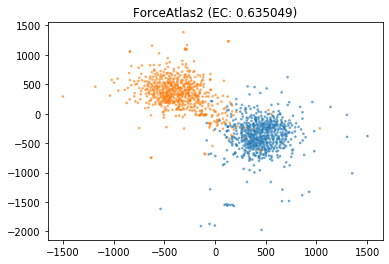

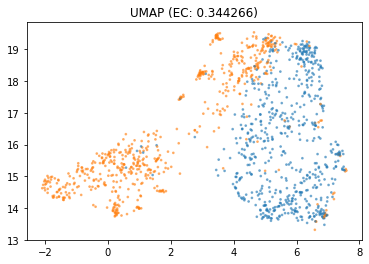

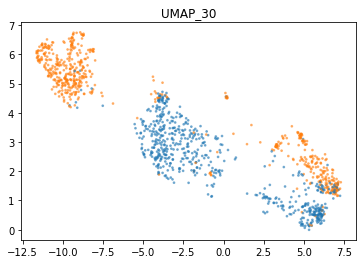

In [22]:
polblogs_cc = nx.read_gml(os.path.join('partitioning', 'datasets', 'polblogs_cc.gml'), label='id')
left_part, right_part = get_partitions('polblogs_cc')
partition = np.zeros(polblogs_cc.number_of_nodes(), dtype='int')
for n in left_part:
    partition[n] = 1
draw_plot(force_atlas_fa2(polblogs_cc, 100), partition, 'ForceAtlas2 (EC: 0.635)')
draw_plot(umap_ec(polblogs_cc), partition, 'UMAP (EC: 0.344)')
draw_plot(umap_ec(polblogs_cc, 30), partition, 'UMAP_30')

100%|██████████| 100/100 [00:05<00:00, 18.14it/s]


BarnesHut Approximation  took  0.55  seconds
Repulsion forces  took  4.77  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.05  seconds


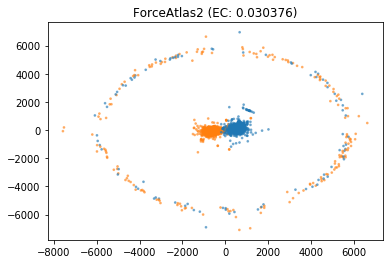

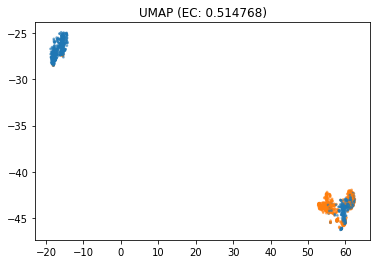

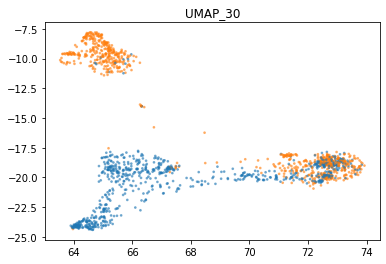

In [23]:
polblogs_cc = nx.read_gml(os.path.join('partitioning', 'datasets', 'polblogs.gml'), label='id')
left_part, right_part = get_partitions('polblogs')
partition = np.zeros(polblogs_cc.number_of_nodes(), dtype='int')
for n in left_part:
    partition[n] = 1
draw_plot(force_atlas_fa2(polblogs_cc, 100), partition, 'ForceAtlas2 (EC: 0.030)')
draw_plot(umap_ec(polblogs_cc), partition, 'UMAP (EC: 0.515)')
draw_plot(umap_ec(polblogs_cc, 30), partition, 'UMAP_30')


In [19]:
plt.rcParams['lines.markersize']


6.0